In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config IPCompleter.greedy=True

In [3]:
#carrega o dataset e converte o campo de data
data = pd.read_csv("result.csv", parse_dates=['date'])
data.head()

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,2013-09-17
1,97,Grand Theft Auto V,X360,8.3,2013-09-17
2,95,The Last of Us,PS3,9.2,2013-06-14
3,94,BioShock Infinite,PS3,8.5,2013-03-26
4,94,BioShock Infinite,PC,8.6,2013-03-25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15647 entries, 0 to 15646
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   metascore  15647 non-null  int64         
 1   name       15647 non-null  object        
 2   console    15647 non-null  object        
 3   userscore  15647 non-null  object        
 4   date       15647 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 611.3+ KB


In [5]:
data.userscore.unique()
#tem nota "tbd", tem que remover antes de trocar o tipo da coluna
#troca os valoes
data["userscore"].replace({"tbd": "0"}, inplace=True)
data["console"].replace({" PC": "PC"}, inplace=True)

In [6]:
#converte para float
data['userscore_float'] = data['userscore'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15647 entries, 0 to 15646
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   metascore        15647 non-null  int64         
 1   name             15647 non-null  object        
 2   console          15647 non-null  object        
 3   userscore        15647 non-null  object        
 4   date             15647 non-null  datetime64[ns]
 5   userscore_float  15647 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 733.6+ KB


In [7]:
data.head()

,metascore,name,console,userscore,date,userscore_float
0,97,Grand Theft Auto V,PS3,8.3,2013-09-17,8.3
1,97,Grand Theft Auto V,X360,8.3,2013-09-17,8.3
2,95,The Last of Us,PS3,9.2,2013-06-14,9.2
3,94,BioShock Infinite,PS3,8.5,2013-03-26,8.5
4,94,BioShock Infinite,PC,8.6,2013-03-25,8.6


In [8]:
df = data.drop(['userscore'],axis=1)
df.head()

,metascore,name,console,date,userscore_float
0,97,Grand Theft Auto V,PS3,2013-09-17,8.3
1,97,Grand Theft Auto V,X360,2013-09-17,8.3
2,95,The Last of Us,PS3,2013-06-14,9.2
3,94,BioShock Infinite,PS3,2013-03-26,8.5
4,94,BioShock Infinite,PC,2013-03-25,8.6


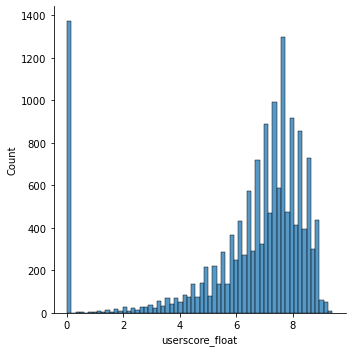

In [9]:
sns.displot(df, x="userscore_float")
#as notas 0 ficaram muito altas, vamos remover

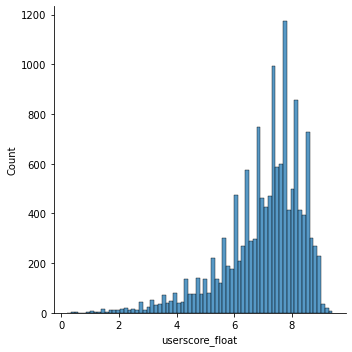

In [10]:
#removendo os 0
index_zero = df[(df['userscore_float'] == 0)].index
df.drop(index_zero , inplace=True)
sns.displot(df, x="userscore_float")

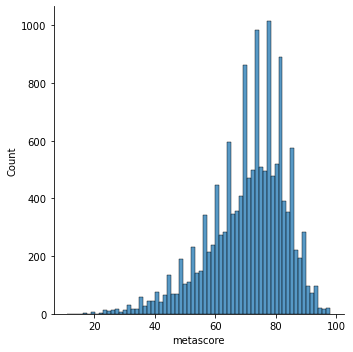

In [11]:
sns.displot(df, x="metascore")

In [12]:
df['userscore_comp'] = df.userscore_float*10
df.head()

,metascore,name,console,date,userscore_float,userscore_comp
0,97,Grand Theft Auto V,PS3,2013-09-17,8.3,83.0
1,97,Grand Theft Auto V,X360,2013-09-17,8.3,83.0
2,95,The Last of Us,PS3,2013-06-14,9.2,92.0
3,94,BioShock Infinite,PS3,2013-03-26,8.5,85.0
4,94,BioShock Infinite,PC,2013-03-25,8.6,86.0


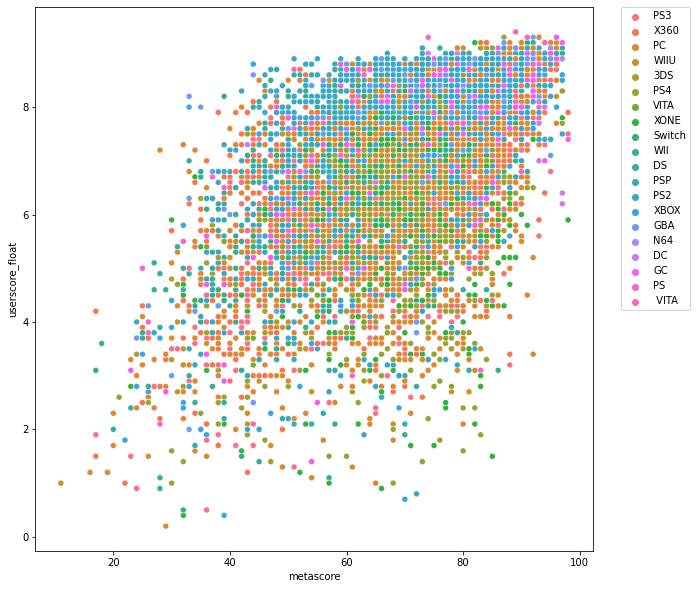

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="metascore", y="userscore_float", hue='console')
#legenda para fora
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='metascore', ylabel='console'>

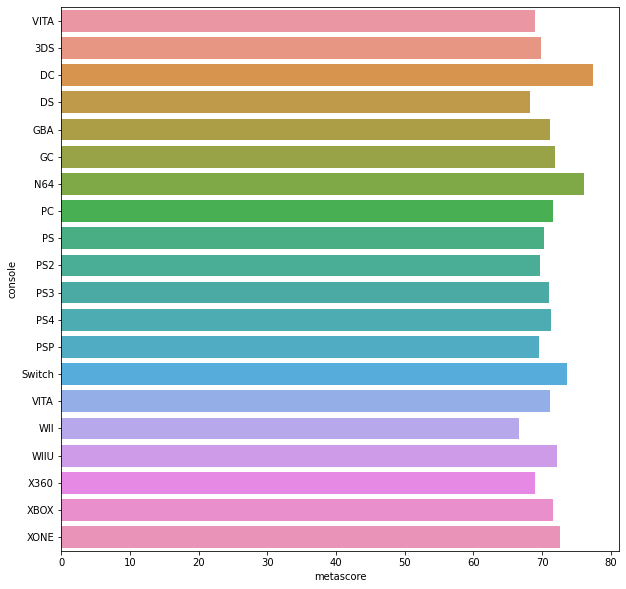

In [14]:
pt_media_console = df.groupby('console').mean().reset_index().sort_values(['console', 'metascore'])
pt_media_console.head()
plt.figure(figsize=(10,10))
sns.barplot(x="metascore", y="console", data=pt_media_console)

<AxesSubplot:xlabel='userscore_comp', ylabel='console'>

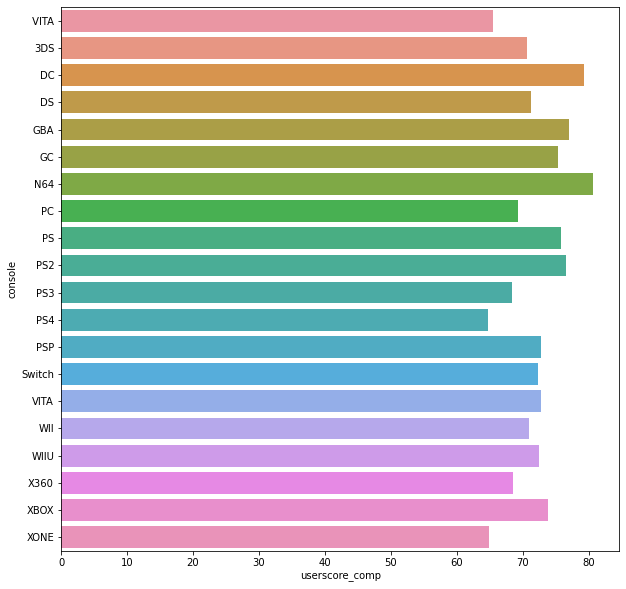

In [15]:
pt_usuario_media_console = df.groupby('console').mean().reset_index().sort_values(['console', 'userscore_comp'])
pt_usuario_media_console.head()
plt.figure(figsize=(10,10))
sns.barplot(x="userscore_comp", y="console", data=pt_usuario_media_console)

<AxesSubplot:xlabel='userscore_comp', ylabel='console'>

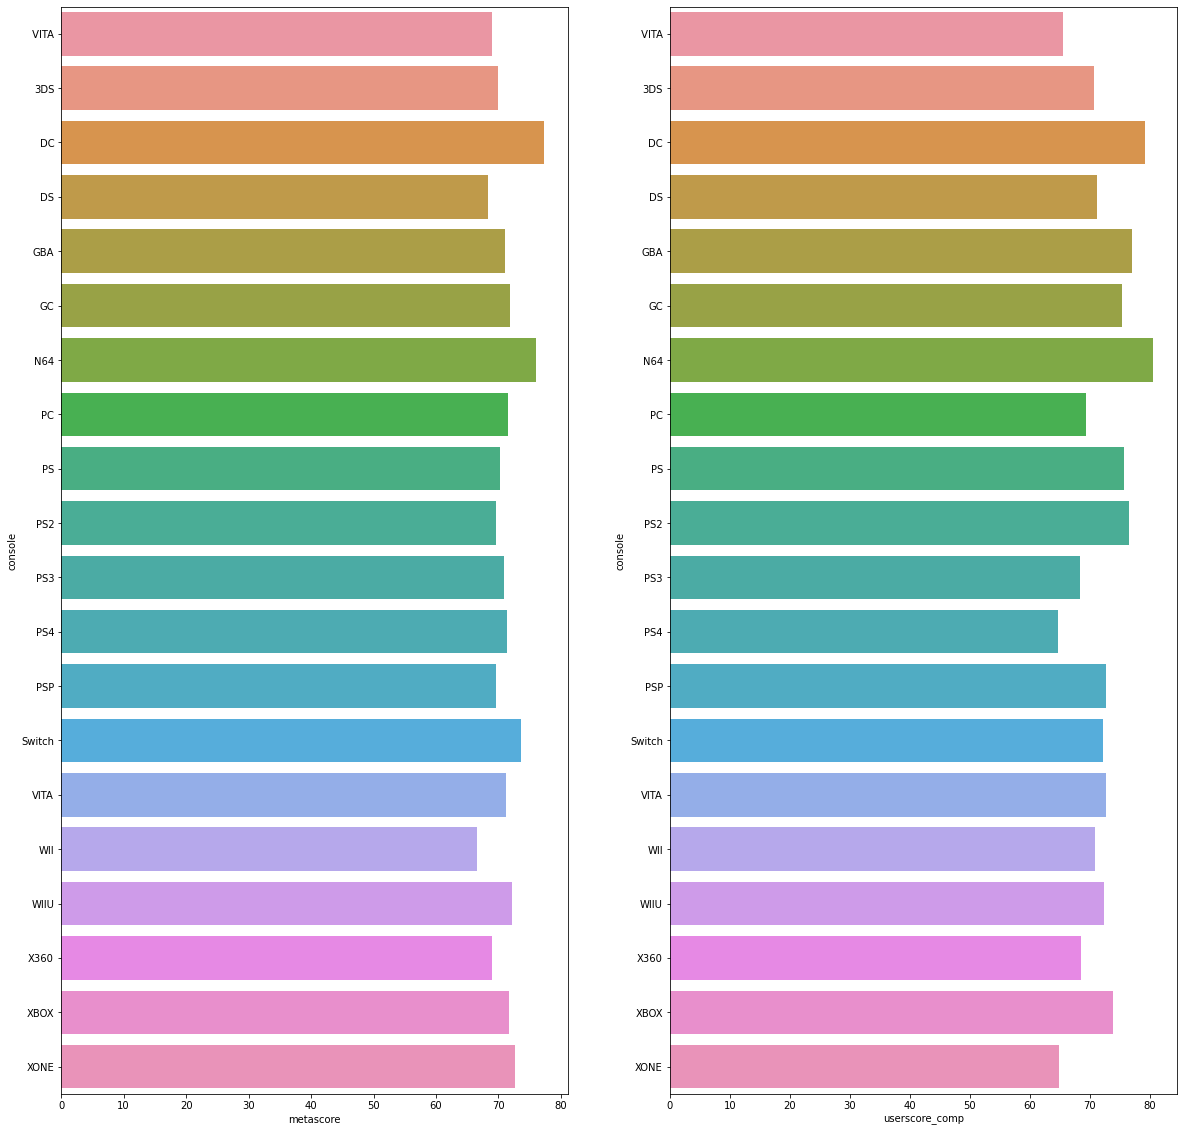

In [16]:
#lado a lado
fig, ax = plt.subplots(1,2, figsize=(20,20))
sns.barplot(x="metascore", y="console", data=pt_media_console, ax=ax[0])
sns.barplot(x="userscore_comp", y="console", data=pt_usuario_media_console, ax=ax[1])

In [17]:
primeiro_lancamento = df.groupby('console')['date'].min().reset_index().sort_values(by=['date'])
primeiro_lancamento

,console,date
8,PS,2000-01-12
7,PC,2000-01-14
6,N64,2000-02-14
2,DC,2000-05-31
9,PS2,2000-10-21
4,GBA,2001-05-30
18,XBOX,2001-10-29
5,GC,2001-11-09
3,DS,2004-11-16
12,PSP,2005-03-14


<AxesSubplot:xlabel='date', ylabel='console'>

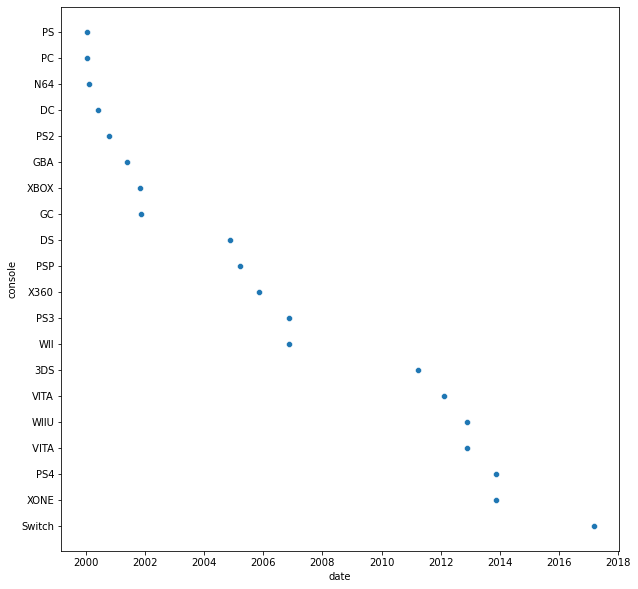

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=primeiro_lancamento, x="date", y="console")

<AxesSubplot:xlabel='date', ylabel='userscore_comp'>

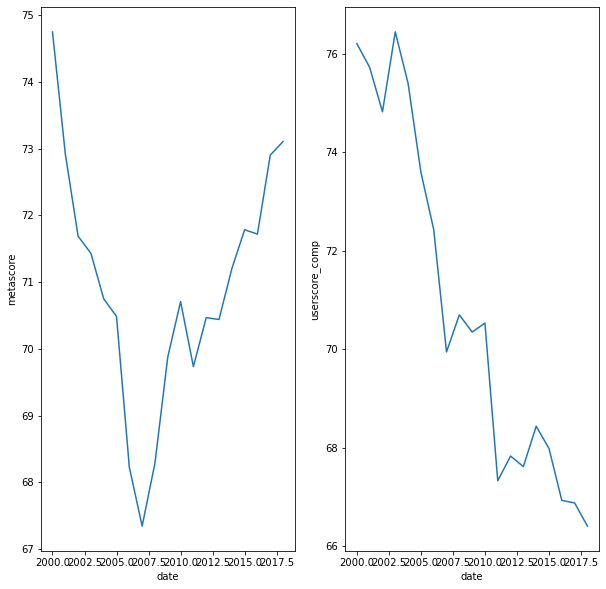

In [19]:
pt_media_ano = df.groupby(df.date.dt.year).mean().reset_index().sort_values(by=['date'])
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.lineplot(x="date", y="metascore", data=pt_media_ano, ax=ax[0])
sns.lineplot(x="date", y="userscore_comp", data=pt_media_ano, ax=ax[1])

In [20]:
qtd_scores = df.groupby('console')['metascore'].count().reset_index(name='quantidade').sort_values(by=['console'])
print(qtd_scores)

   console  quantidade
0     VITA           2
1      3DS         378
2       DC          93
3       DS         551
4      GBA         292
5       GC         385
6      N64          31
7       PC        3791
8       PS         104
9      PS2        1286
10     PS3        1217
11     PS4        1314
12     PSP         450
13  Switch         411
14    VITA         252
15     WII         581
16    WIIU         185
17    X360        1582
18    XBOX         649
19    XONE         720
